In [1]:
# This is a tutorial for time series forcasting using Facebook Prophet
# PS: I don't know why I have doublme plots !!

In [2]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')


In [3]:
# Read sales data:
df_sales= pd.read_csv('../data/example_retail_sales.csv')

In [4]:

df = df_sales.reset_index()

In [5]:
df.dtypes

index     int64
ds       object
y         int64
dtype: object

In [6]:
# It's time series data'
df.head()

,index,ds,y
0,0,1992-01-01,146376
1,1,1992-02-01,147079
2,2,1992-03-01,159336
3,3,1992-04-01,163669
4,4,1992-05-01,170068


This is the format that Prophet expects to see. There needs to be a ‘ds’ column  that contains the datetime field and and a ‘y’ column that contains the value we are wanting to model/forecast.

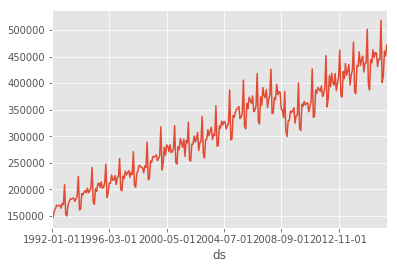

In [7]:
df.set_index('ds').y.plot()

In [9]:
# log-tranform the data to make it more stationary and convert trends to a linear one (bot really necessary)s)
df['y'] = np.log(df['y'])

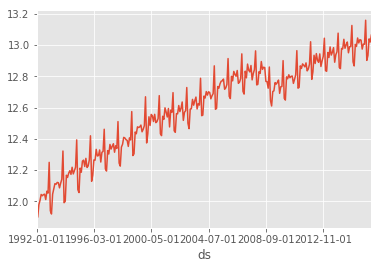

In [10]:
# plot with log:
df.set_index('ds').y.plot()

In [11]:
# Run Prophet
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [53]:
future = model.make_future_dataframe(periods=24, freq = 'm',)
future.tail()

,ds
312,2017-12-31
313,2018-01-31
314,2018-02-28
315,2018-03-31
316,2018-04-30


In [13]:
forecast = model.predict(future)

In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
312,2017-12-31,12.977976,12.918609,13.040070
313,2018-01-31,13.010391,12.951532,13.070167
314,2018-02-28,13.098237,13.035381,13.172532
315,2018-03-31,13.088853,13.019382,13.163921
316,2018-04-30,13.141038,13.066226,13.224285


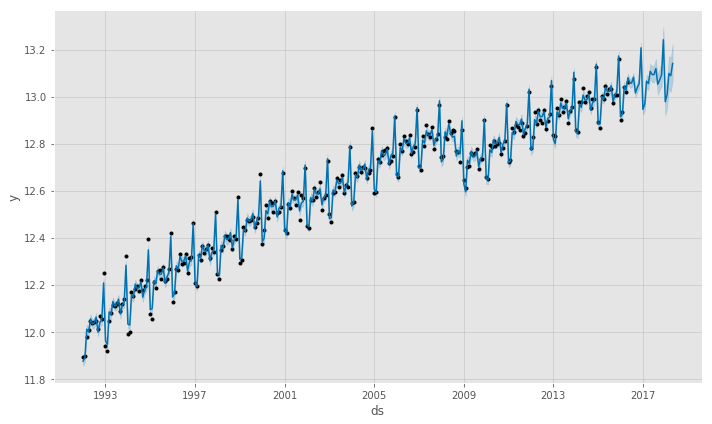

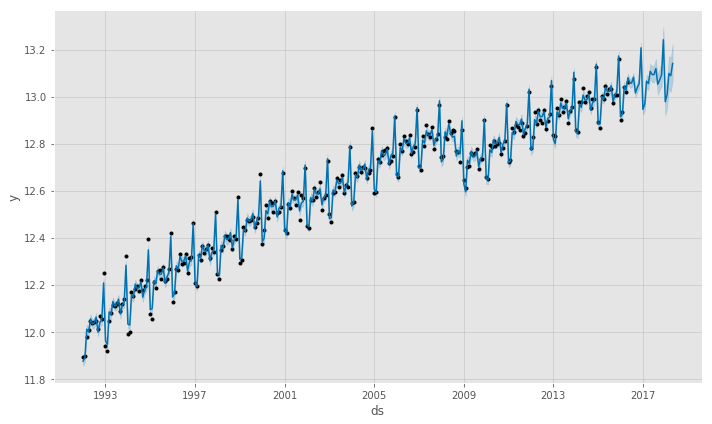

In [15]:
# plot future
model.plot(forecast)

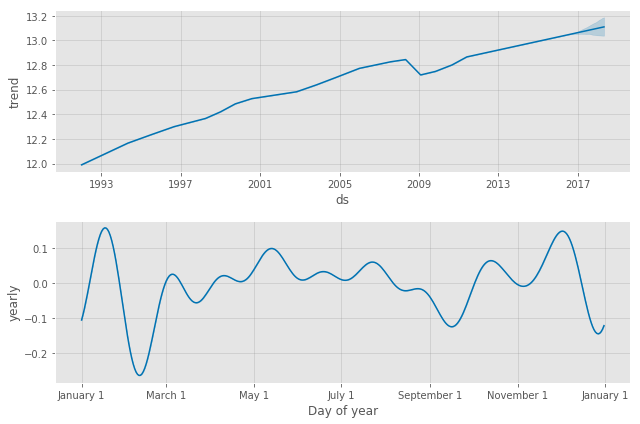

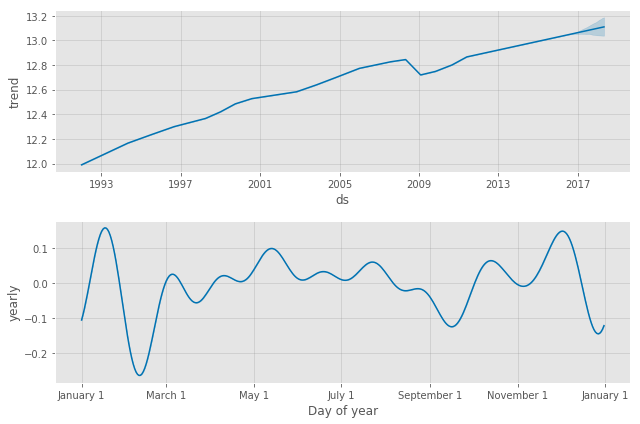

In [16]:
model.plot_components(forecast)

In [33]:
# add Holidays:
promotions = pd.DataFrame({
  'holiday': 'december_promotion',
  'ds': pd.to_datetime(['2009-12-01', '2010-12-01', '2011-12-01', '2012-12-01',
                        '2013-12-01', '2014-12-01','2015-12-01']),
  'lower_window': 0,
  'upper_window': 0,
})

In [34]:
# fit a model while considering holidays 

In [35]:
model_holidays = Prophet(holidays=promotions)

In [36]:
df_holidays = df_sales.reset_index()

In [37]:
df_holidays['y'] = np.log(df_holidays['y'])

In [38]:
model_holidays.fit(df_holidays);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future_holidays = model_holidays.make_future_dataframe(periods=24, freq = 'm', include_history =False)
future_holidays.tail()

,ds
19,2017-12-31
20,2018-01-31
21,2018-02-28
22,2018-03-31
23,2018-04-30


In [57]:
forecast_holidays = model_holidays.predict(future_holidays)

In [58]:
forecast_holidays[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
19,2017-12-31,12.978357,12.924797,13.035933
20,2018-01-31,13.010925,12.951815,13.074280
21,2018-02-28,13.099651,13.037930,13.162738
22,2018-03-31,13.090539,13.021387,13.158351
23,2018-04-30,13.142933,13.068150,13.212779


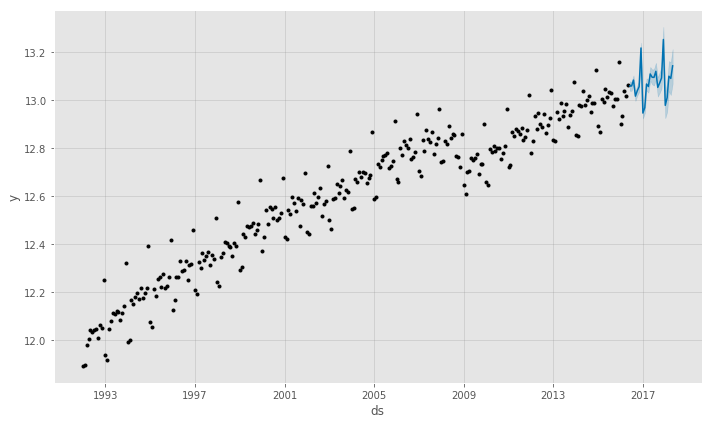

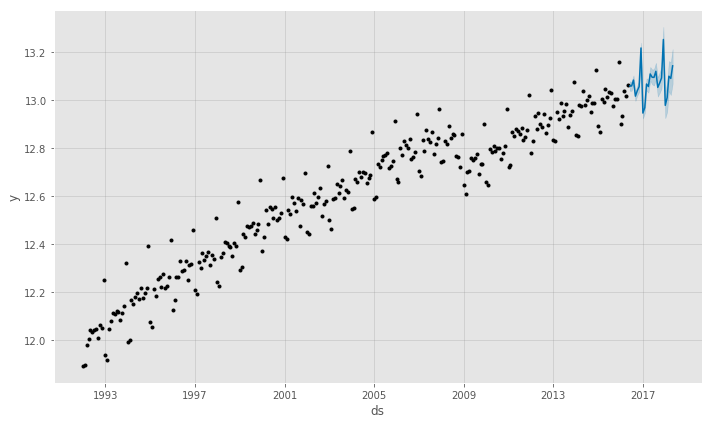

In [59]:
model_holidays.plot(forecast_holidays)


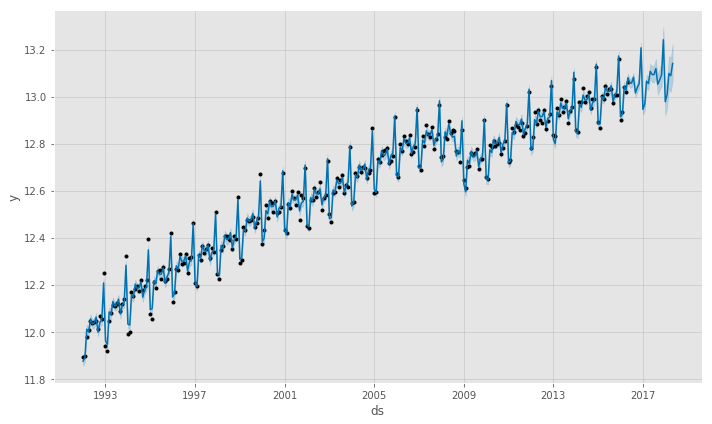

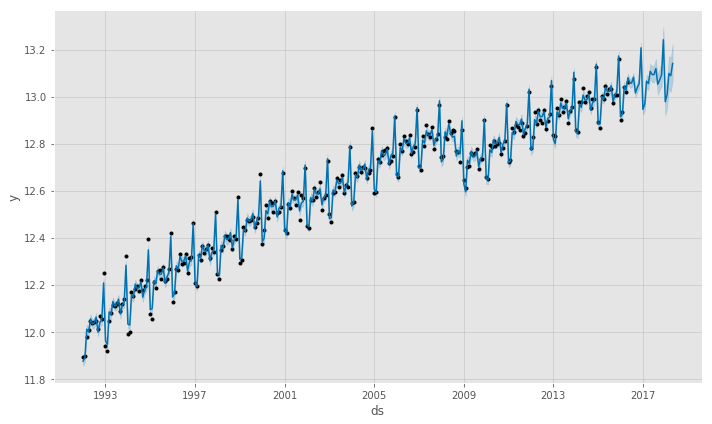

In [60]:
model.plot(forecast)

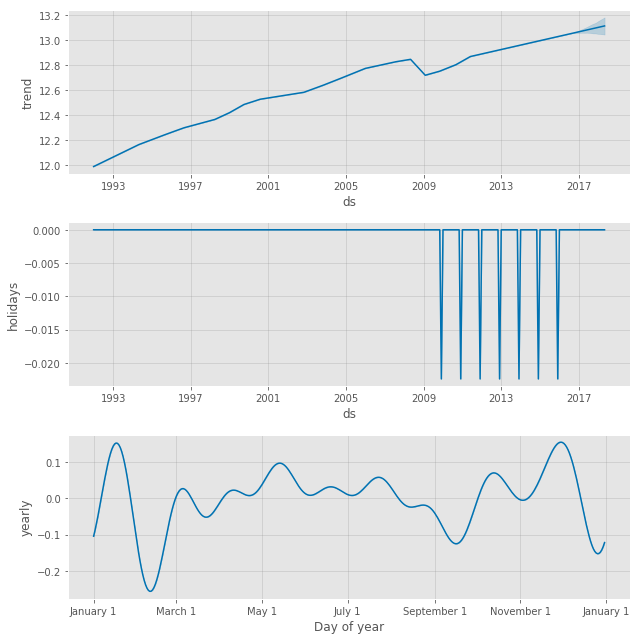

In [50]:
model_holidays.plot_components(forecast_holidays);

In [ ]:
# This isn't an enormous differnece between using holidays and no holidays: (<1%). Still There is some difference between using holidays and not using holidays.